In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam (1).csv


In [ ]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Droping unwanted columns
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)



In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Naming the columns
data.rename(columns = {'v1':'class','v2':'text'},inplace=True)

In [ ]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,class,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.isnull().any()

class    False
text     False
dtype: bool

In [ ]:
data.isnull().sum()

class    0
text     0
dtype: int64

In [ ]:
#data visualization
data['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7eaddc8f9090>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

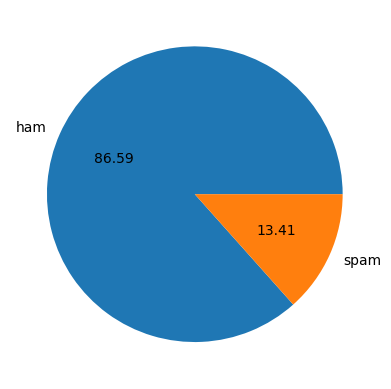

In [ ]:
plt.pie(data['class'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

<Axes: xlabel='class', ylabel='count'>

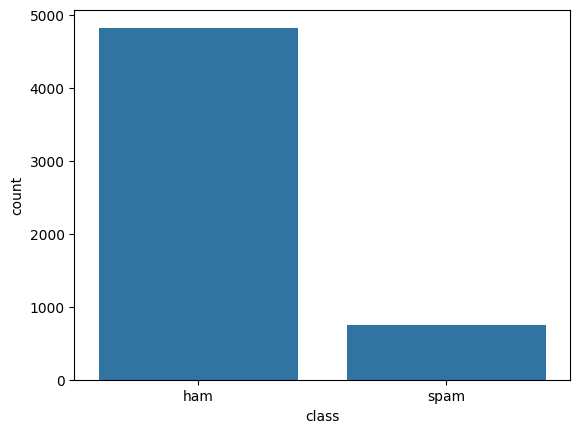

In [ ]:
sns.countplot(x='class',data=data)

In [ ]:
data['lenght']=data['text'].apply(len)


In [ ]:
data['class_num'] = data['class'].map({'ham':0,'spam':1})
data.head()

,class,text,lenght,class_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [ ]:
#split the data
x=data['text']
y=data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1, random_state=11)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
#converting features into numeric vector
X_train = vect.fit_transform(x_train)
#converting target into numeric vector
X_test = vect.transform(x_test)

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l1')

In [ ]:
#defining functions for training and testing data

def training(clf,x_train,Y_train):
    clf.fit(x_train,Y_train)

#function for predicting labels

def predict(clf,X_test):
    return clf.predict(X_test)

In [ ]:
classifier={'logistic': lr }

In [ ]:
score = []
for n,c in classifier.items():
    training(c,X_train.toarray(),y_train)
    pred = predict(c,X_test.toarray())
    score.append((n,[accuracy_score(y_test,pred,normalize=True)]))

In [ ]:
score_df = pd.DataFrame.from_dict(dict(score), orient='index', columns=['scores'])
score_df['Accuracy (%)']=score_df['scores']*100
print(score_df)



            scores  Accuracy (%)
logistic  0.987455      98.74552
